## Presented by Vibhudendra S, upGrad & IIITB | Data Science Program - February 2024, Batch ID 5702

### Problem Statement

#### 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Business Goal

#### 
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

In [6]:
## Importing the standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_columns', 500)

In [8]:
## Importing the dataset

df = pd.read_csv('Leads.csv')

### Data Understanding

In [10]:
## Checking the dataset first 5 rows

df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [11]:
### Checking the shape of dataset

df.shape

(9240, 37)

#### This dataset has 9,240 records & 37 features

In [13]:
#### Checking the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### There are 30 categorical features & 7 numerical features

In [15]:
### Understanding the numerical features

df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Data Pre-processing

In [17]:
# Checking for duplicates and dropping the entire duplicate row if any:-

df.drop_duplicates(subset=None, inplace=True)

In [18]:
df.shape

(9240, 37)

#### There are no duplicate records as the number of records before removing duplicate & post dropping duplicates remain same

#### replace select values as null in respective features

In [21]:
df = df.replace('Select', np.nan)

In [22]:
# After 'NaN' imputation Checking 'Select' level is available or not:-

select_columns=list(df.columns)
for i in select_columns:
    if 'Select' in df[i].values:
        print(i)

#### There are no features having 'Select' as values anymore

#### Understanding & handling Null values

In [25]:
# Checking null values column wise:-

df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [26]:
nvdf = df.isnull().mean()*100

In [27]:
nvdf[nvdf > 40]

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

#### 
Features 'How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' have null values more than 40%. 

In [29]:
#Creating a copy of original dataset

df1 = df.copy()

In [30]:
df1 = df1.drop(['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score' ], axis = 1)

In [31]:
df1.shape

(9240, 30)

In [32]:
nvdf = df1.isnull().mean()*100

In [33]:
nvdf[nvdf > 0].sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

#### It is impractical to impute null values for features like 'City', 'Tags', it is advisable to drop these features

In [35]:
df1 = df1.drop(['City', 'Tags'], axis = 1)

In [36]:
df1.shape

(9240, 28)

In [37]:
nvdf = df1.isnull().mean()*100

In [38]:
nvdf[nvdf > 0].sort_values(ascending = False)

Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

In [39]:
# Imputing missing value with 'Other' for feature 'Specialization':-

df1['Specialization'].fillna('Other',inplace=True)

In [40]:
nvdf = df1.isnull().mean()*100

In [41]:
nvdf[nvdf > 0].sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

In [42]:
# Checking value count of 'What matters most to you in choosing a course' variable:-

df1['What matters most to you in choosing a course'].value_counts(normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: proportion, dtype: float64

In [43]:
# Impute 'Better Career Prospects' for missing value to 'What matters most to you in choosing a course' variable

df1['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [44]:
nvdf = df1.isnull().mean()*100

In [45]:
nvdf[nvdf > 0].sort_values(ascending = False)

What is your current occupation    29.112554
Country                            26.634199
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Last Activity                       1.114719
Lead Source                         0.389610
dtype: float64

In [46]:
# Checking value count of 'What is your current occupation' variable:-

df1['What is your current occupation'].value_counts(normalize=True)*100

What is your current occupation
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: proportion, dtype: float64

In [47]:
# Imputing missing value with 'Other' for feature 'What is your current occupation':-

df1['What is your current occupation'].fillna('Other',inplace=True)

In [48]:
nvdf = df1.isnull().mean()*100

In [49]:
nvdf[nvdf > 0].sort_values(ascending = False)

Country                 26.634199
TotalVisits              1.482684
Page Views Per Visit     1.482684
Last Activity            1.114719
Lead Source              0.389610
dtype: float64

#### 
As we have already dropped 'City' feature, it doesnt make any sense to impute values like 'Unknown' of 'Others' to 'Country' feature, it is advisable to drop this feature

In [51]:
df1 = df1.drop(['Country'], axis = 1)

In [52]:
df1.shape

(9240, 27)

In [53]:
nvdf = df1.isnull().mean()*100

In [54]:
nvdf[nvdf > 0].sort_values(ascending = False)

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
dtype: float64

In [55]:
# Checking value count of 'TotalVisits' variable:-

df1['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [56]:
# Impute median value for 'TotalVisits' feature

df1['TotalVisits'].fillna(df1['TotalVisits'].median(), inplace=True)

In [57]:
nvdf = df1.isnull().mean()*100

In [58]:
nvdf[nvdf > 0].sort_values(ascending = False)

Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
dtype: float64

In [59]:
# Checking value count of 'Page Views Per Visit' variable:-

df1['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [60]:
# Impute median value for 'Page Views Per Visit' feature

df1['Page Views Per Visit'].fillna(df1['Page Views Per Visit'].median(), inplace=True)

In [61]:
nvdf = df1.isnull().mean()*100

In [62]:
nvdf[nvdf > 0].sort_values(ascending = False)

Last Activity    1.114719
Lead Source      0.389610
dtype: float64

In [63]:
# Checking value count of 'Last Activity' variable:-

df1['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: proportion, dtype: float64

In [64]:
df1['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [65]:
# Impute mode value(Email Opened) for 'Last Activity' feature as it is the highest value by percentage also.

df1['Last Activity'].fillna('Email Opened',inplace=True)

In [66]:
nvdf = df1.isnull().mean()*100

In [67]:
nvdf[nvdf > 0].sort_values(ascending = False)

Lead Source    0.38961
dtype: float64

In [68]:
# Checking value count of 'Lead Source' variable:-

df1['Lead Source'].value_counts(normalize=True)*100

Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: proportion, dtype: float64

In [69]:
df1['Lead Source'].mode()

0    Google
Name: Lead Source, dtype: object

In [70]:
# Impute mode value(Google) for 'Lead Source' feature as it is the highest value by percentage also.

df1['Lead Source'].fillna('Google',inplace=True)

In [71]:
nvdf = df1.isnull().mean()*100

In [72]:
nvdf[nvdf > 0].sort_values(ascending = False)

Series([], dtype: float64)

In [73]:
df1.isnull().mean()*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [74]:
df1.shape

(9240, 27)

#### 
'Prospect ID' & 'Lead Number' are unique values for identification purpose only, not required for model building. Hence, we drop these features

In [76]:
df1 = df1.drop(['Prospect ID','Lead Number'], axis = 1)

In [77]:
df1.shape

(9240, 25)

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Specialization                                 9240 

### Checking the class data imbalance

In [141]:
for i in df1.columns:
    print(df1[i].value_counts(normalize = True), '\n')

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64 

Lead Source
Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: proportion, dtype: float64 

Do Not Email
No     0.920563
Yes    0.079437
Name: proportion, dtype: float64 

Do Not Call
No  

#### 
Features listed herewith have highly imbalanced data, no significance on model building & hence will be dropped
'Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
 'Get updates on DM Content', 'I agree to pay the amount through cheque'

In [143]:
df1 = df1.drop(['Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
 'Get updates on DM Content', 'I agree to pay the amount through cheque' ], axis = 1)

In [145]:
df1.shape

(9240, 12)

In [147]:
df1.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                    Other   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [153]:
df1.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.438636                   487.698268   
std       0.486714     4.819024                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.357440  
std                2.145781  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

### Data Visualization/EDA

In [159]:
## Creating a list of numerical and categorical features

num_f = ['Converted', 'TotalVisits', 'Total Time Spent on Website',	'Page Views Per Visit']
print(num_f, '\n')
cat_f = df1.select_dtypes(exclude=['float64', 'int64']).columns
print(cat_f)

['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] 

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


<Figure size 500x200 with 0 Axes>

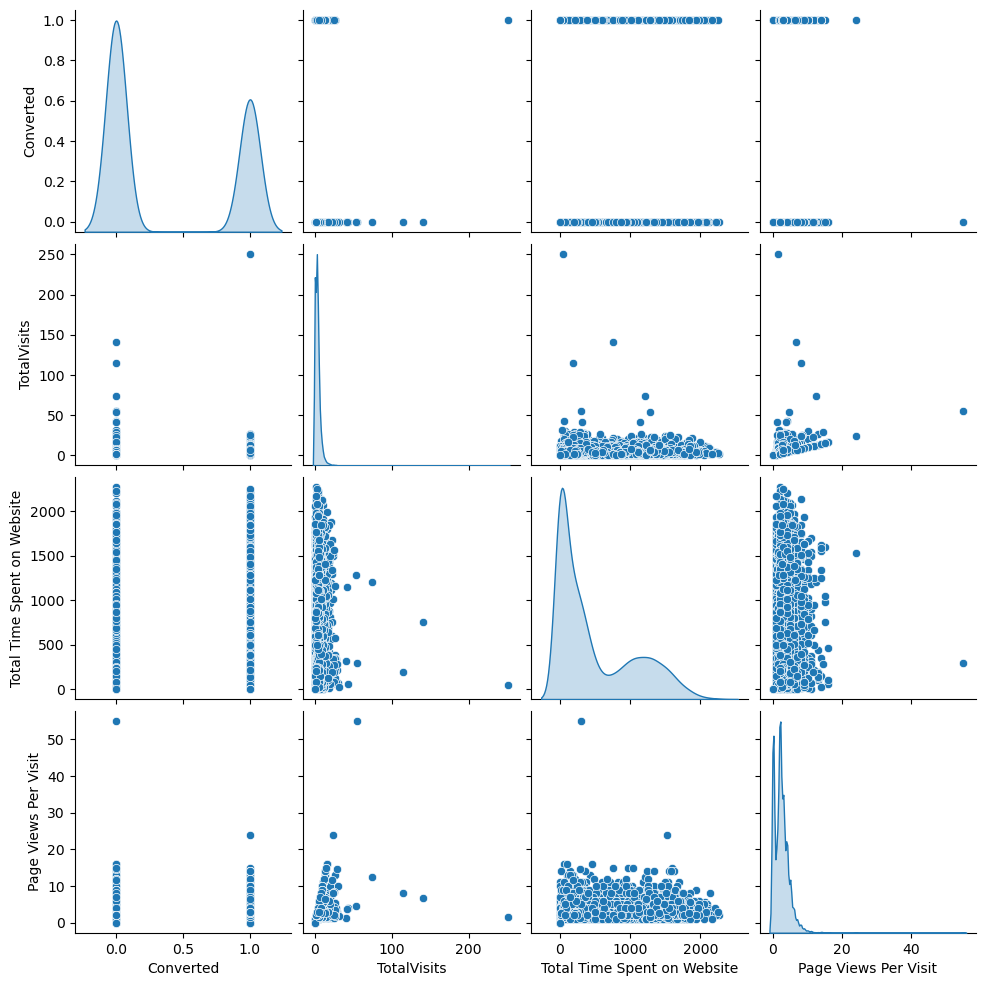

In [163]:
plt.figure(figsize = [5,2])
sns.pairplot(data = df1, diag_kind = 'kde')
plt.show()

#### 
Features 'TotalVisits', 'Total Time Spent on Website',	'Page Views Per Visit' have no linear correlation with target feature 'Converted'

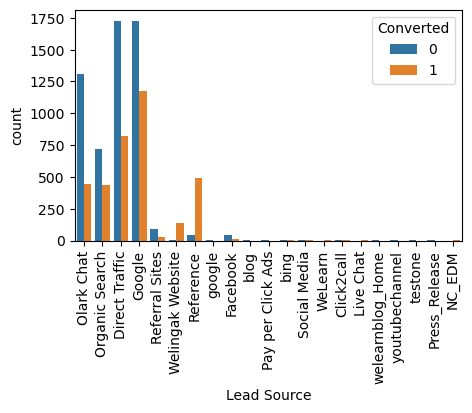

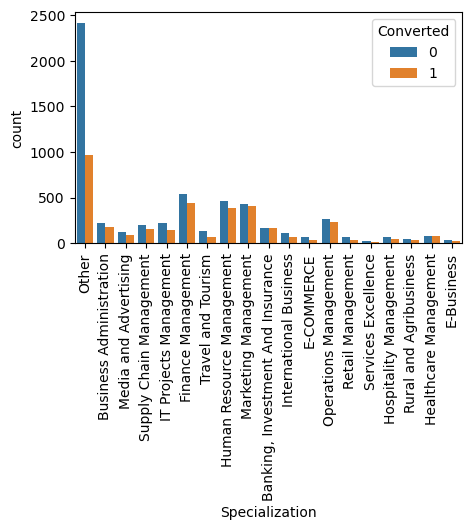

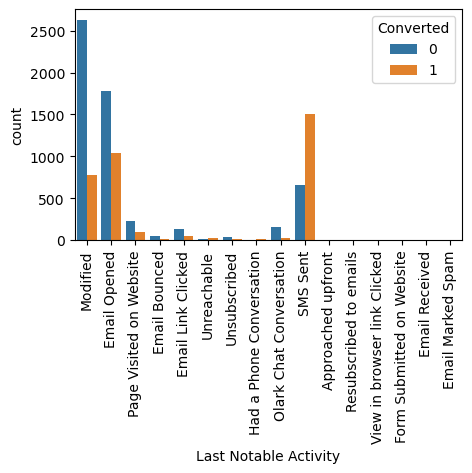

In [176]:
for i in df1[cat_f]:
    plt.figure(figsize = [5,3])
    sns.countplot(x = i, data = df1, hue = 'Converted')
    plt.xticks(rotation = 90)
    plt.show()

### Insights & Recommendations
Lead Origins like 'API' & 'Landing Page Submission' have significant impact on lead conversions.

Lead Sources like 'Google', 'Direct Traffic', 'Reference', 'Olark Chat' & 'Organic Search' have significant impact on lead conversions.

Those who have opted for email have significant impact on lead conversions.

If the Last Activity is either 'SMS sent' or 'Email opened', then they have significant impact on lead conversions.

Those who have mentioned specialization as 'Others' have significant impact on lead conversions.

Those who are 'Unemployed' have significant impact on lead conversions.

Those who have not opted for 'A free copy of Mastering The Interview' have significant impact on lead conversions.

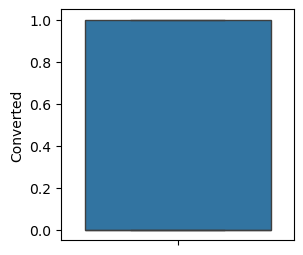

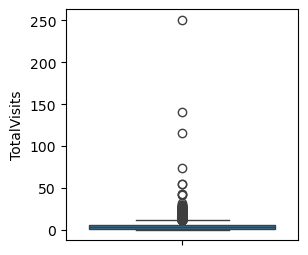

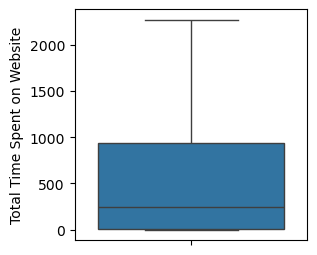

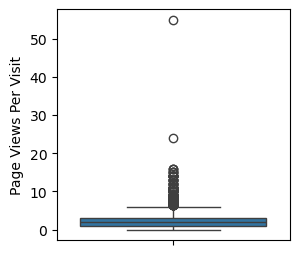

In [180]:
for i in df1[num_f]:
    plt.figure(figsize=[3,3])
    sns.boxplot(y=df1[i])
    plt.show()

#### 'Total Visits' & 'Page Views Per Visit' have outliers on the upper range & requires Outlier Treatment. From describe function previously, it was observed that 75th percentile value of 'Total Visits' is 5 &  for 'Page Views Per Visit' is 3. Hence need to cap maximum values to 99th percentile.

In [188]:
# Treating upper range outliers by capping upper range to 0.99:-

q99_total_visits = df1['TotalVisits'].quantile(0.99)
q99_page_views_per_visit = df1['Page Views Per Visit'].quantile(0.99)

df1 = df1[(df1['TotalVisits'] <= q99_total_visits)]
df1 = df1[(df1['Page Views Per Visit'] <= q99_page_views_per_visit)]

### 
Verifying post Outlier treatment of 'Total Visits' & 'Page Views per Visit'

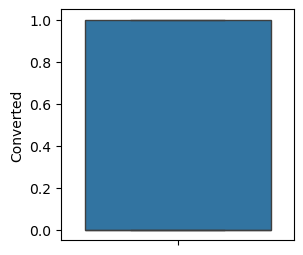

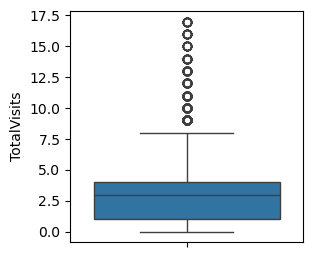

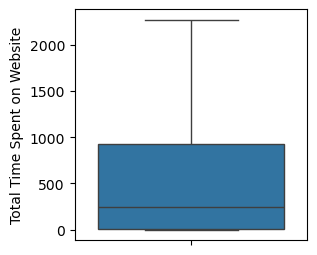

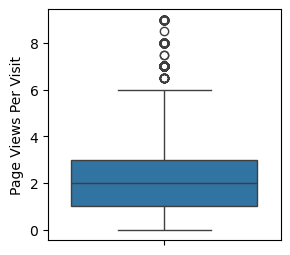

In [191]:
for i in df1[num_f]:
    plt.figure(figsize=[3,3])
    sns.boxplot(y=df1[i])
    plt.show()

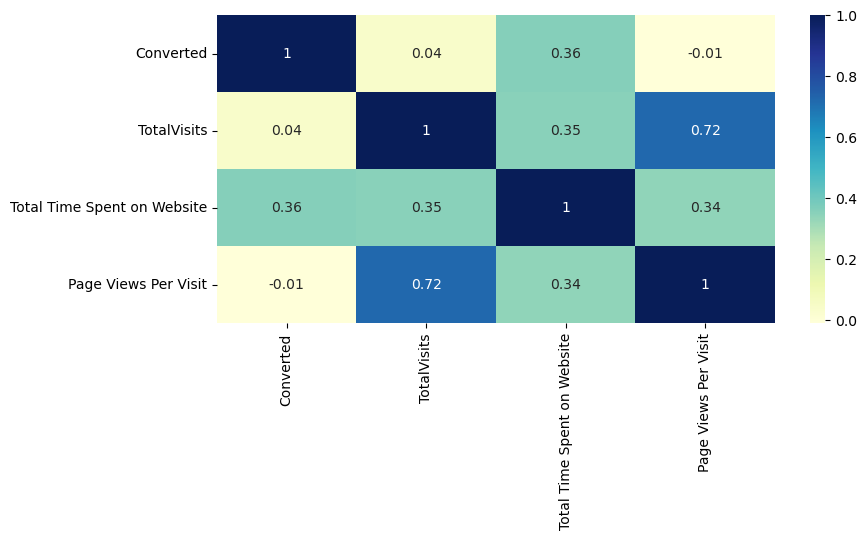

In [193]:
## Visualizing the correlation with heat map

plt.figure(figsize = [9,4])
sns.heatmap(df1[num_f].corr().round(2), annot = True, cmap="YlGnBu")
plt.show()

#### 'Page Views Per Visit' & 'Total Visits' have a high correlation of 0.72

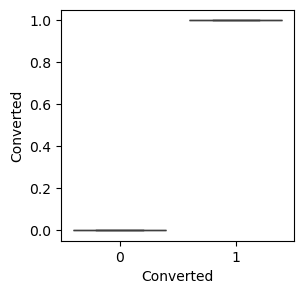

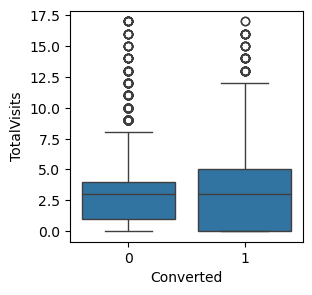

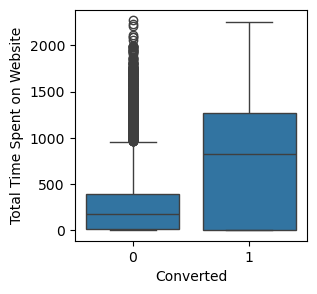

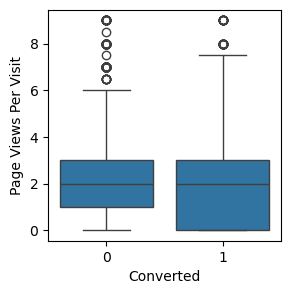

In [196]:
for i in df1[num_f]:
    plt.figure(figsize=[3,3])
    sns.boxplot(x = 'Converted', y=df1[i], data = df1)
    plt.show()

#### 
Those who have visited the website atleast 5 times have significant impact on lead conversion rate.

Those who have spent total time on website of around 1200 units have significant impact on lead conversion rate.

Those who have viewed Average number of pages on the website of atleast 3 have significant impact on lead conversion rate.

In [199]:
df1.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                    Other   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

####  Features 'Last Activity' & 'Last Notable Activity' seems to signify similar significance on information & hence we decide to drop one of these features 'Last Notable Activity'

In [203]:
df1 = df1.drop('Last Notable Activity', axis = 1)

In [205]:
df1.shape

(9090, 11)

In [207]:
df1.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                    Other   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

## Data Preparation

#### Converting some binary variables (Yes/No) to 1/0

In [210]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the df1 list
df1[varlist] = df1[varlist].apply(binary_map)

In [212]:
df1.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                    Other   

  What is your current occupation  A free copy of Mastering The Interview  
0                      Unemployed                                       0  
1                      Unemployed                                       0  
2                         Student                                       1  
3                      Unemployed                                       0  
4                      Unemployed                                       0

In [214]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9090 non-null   object 
 1   Lead Source                             9090 non-null   object 
 2   Do Not Email                            9090 non-null   int64  
 3   Converted                               9090 non-null   int64  
 4   TotalVisits                             9090 non-null   float64
 5   Total Time Spent on Website             9090 non-null   int64  
 6   Page Views Per Visit                    9090 non-null   float64
 7   Last Activity                           9090 non-null   object 
 8   Specialization                          9090 non-null   object 
 9   What is your current occupation         9090 non-null   object 
 10  A free copy of Mastering The Interview  9090 non-null   int64  
d

#### Converting five features 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization' & 'What is your current occupation' into numerical features using dummies

In [217]:
dum_df = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation']], drop_first = True, dtype = 'int')
df1 = pd.concat( [df1, dum_df] , axis = 1 )
df1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'], axis = 1, inplace = True)

In [219]:
df1.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0       

In [221]:
df1.shape

(9090, 69)

In [223]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9090 non-null   int64  
 1   Converted                                             9090 non-null   int64  
 2   TotalVisits                                           9090 non-null   float64
 3   Total Time Spent on Website                           9090 non-null   int64  
 4   Page Views Per Visit                                  9090 non-null   float64
 5   A free copy of Mastering The Interview                9090 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9090 non-null   int32  
 7   Lead Origin_Lead Add Form                             9090 non-null   int32  
 8   Lead Origin_Lead Import                               9090 non-

#### All the 11 features have now been converted to numerical type

## Splitting the data into Train and Test sets

In [227]:
from sklearn.model_selection import train_test_split

In [229]:
# Putting feature variable to X
X = df1.drop(['Converted'], axis=1)

X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
0                      0                   0                       1   
1                      0                   0                       0   
2                      0                   0                       0   
3                      0                   0                       0   
4                      0                   0                       0   

   Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
0                           0                              0   
1                           1                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Lead Source_Press_Release  Lead Source_Reference  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   Lead Source_Referral Sites  Lead Source_Social Media  Lead Source_WeLearn  \
0                           0                         0                    0   
1                           0                         0                    0   
2                           0                         0                    0   
3                           0                         0                    0   
4                           0                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0  

In [231]:
# Putting target variable to y
y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [233]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [235]:
X_train.shape

(6363, 68)

In [237]:
X_test.shape

(2727, 68)

## Feature Scaling

In [242]:
from sklearn.preprocessing import StandardScaler

In [244]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
302              0     1.336782                    -0.428736   
6087             1    -1.094877                    -0.887355   
1033             0     0.642022                    -0.025151   
7656             1     0.989402                    -0.241619   
3241             0     0.294642                     0.897591   

      Page Views Per Visit  A free copy of Mastering The Interview  \
302               0.044021                                       0   
6087             -1.206716                                       0   
1033              1.477269                                       0   
7656              2.014065                                       1   
3241             -0.492776                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
302                                     0                          0   
6087                                    0                          0   
1033                                    0                          0   
7656                                    1                          0   
3241                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
302                         0                           0   
6087                        0                           0   
1033                        0                           0   
7656                        0                           0   
3241                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
302                            0                     0                   0   
6087                           0                     0                   0   
1033                           0                     0                   1   
7656                           1                     0                   0   
3241                           1                     0                   0   

      Lead Source_Live Chat  Lead Source_NC_EDM  Lead Source_Olark Chat  \
302                       0                   0                       0   
6087                      0                   0                       1   
1033                      0                   0                       0   
7656                      0                   0                       0   
3241                      0                   0                       0   

      Lead Source_Organic Search  Lead Source_Pay per Click Ads  \
302                            0                              0   
6087                           0                              0   
1033                           0                              0   
7656                           0                              0   
3241                           0                              0   

      Lead Source_Press_Release  Lead Source_Reference  \
302                           0                      0   
6087                          0                      0   
1033                          0                      0   
7656                          0                      0   
3241                          0                      0   

      Lead Source_Referral Sites  Lead Source_Social Media  \
302                            1                         0   
6087                           0                         0   
1033                           0                         0   
7656                           0                         0   
3241                           0                         0   

      Lead Source_WeLearn  Lead Source_Welingak Website  Lead Source_bing  \
302                     0                             0                 0   
6087                    0                             0                 0   
1033                    0                             0                 0   
7656                    0                      

In [246]:
#Checking the Converted Rate
converted = (sum(df1['Converted'])/len(df1['Converted'].index))*100
converted

38.448844884488445

#### We have almost 38% lead converted rate

### Looking at Correlations

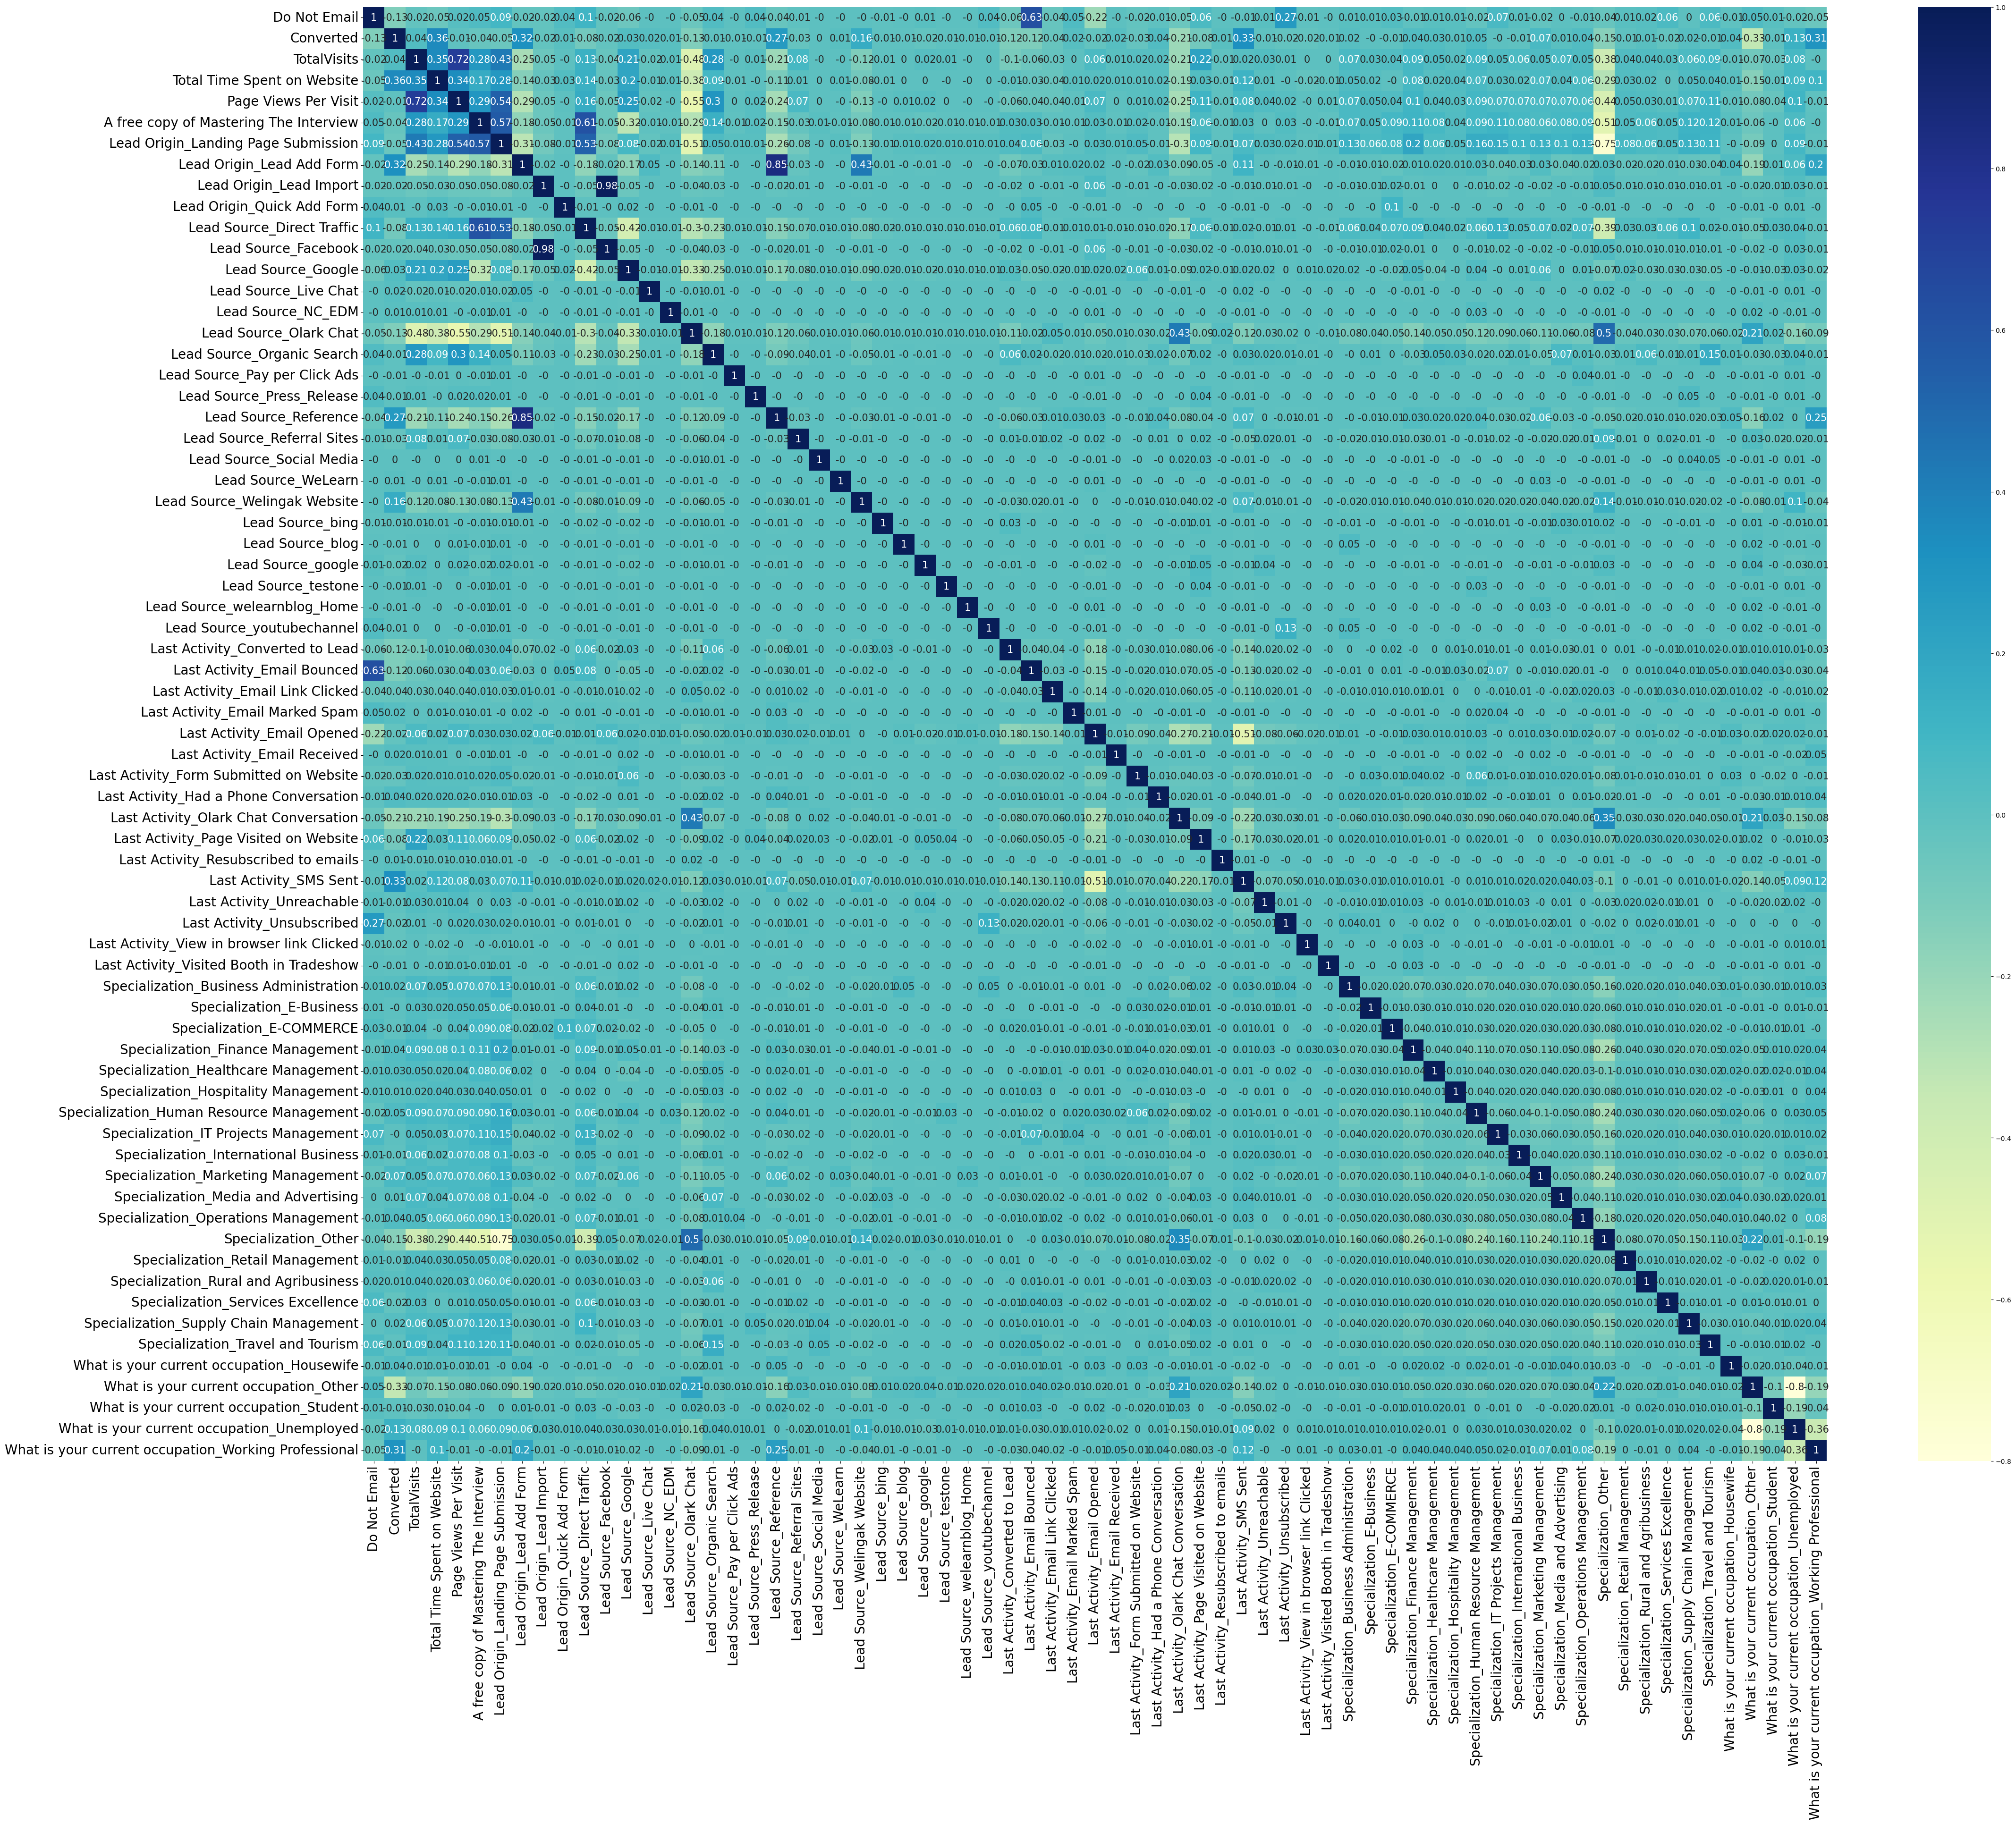

In [268]:
# Let's see the correlation matrix 

plt.figure(figsize = (50,40))        # Size of the figure
sns.heatmap(df1.corr().round(2),annot = True, cmap="YlGnBu", annot_kws={"size": 15})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

#### 
'Do Not Email' & 'Last Activity_email bounced' have high correlation of 0.63.

'Lead Origin_Lead Add Form' and 'Lead Source_Referance' having higher correlation of 0.85.

'Lead Source_Facebook' and 'Lead Origin_Lead Import' having higher correlation of 0.98

'TotalVisits' and 'Page Views Per Visit' having correlation of 0.72.

## Model Building

In [273]:
from sklearn.linear_model import LogisticRegression

In [275]:
logreg = LogisticRegression()

### Feature Selection Using RFE

In [278]:
from sklearn.feature_selection import RFE

In [282]:
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [284]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Origin_Quick Add Form', False, 34),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 11),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Live Chat', False, 35),
 ('Lead Source_NC_EDM', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Pay per Click Ads', False, 52),
 ('Lead Source_Press_Release', False, 46),
 ('Lead Source_Reference', False, 27),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 39),
 ('Lead Source_blog', Fa

In [286]:
# Storing columns selected by RFE into 'col' and displaying it:-

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Other',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [288]:
# Displaying columns which are not selected by RFE:-

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to ema

### Running first model on train data set using features from RFE

In [291]:
import statsmodels.api as sm

In [293]:
# Adding a constant
X_train_sm = sm.add_constant(X_train[col])

# Fitting first model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.4
Date:                Wed, 16 Oct 2024   Deviance:                       5110.7
Time:                        23:15:58   Pearson chi2:                 7.00e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4093
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3027      0.127     -2.379      0.017      -0.552      -0.053
Do Not Email                                            -1.5964      0.179     -8.910      0.000      -1.948      -1.245
Total Time Spent on Website                              1.0680      0.040     26.412      0.000       0.989       1.147
Lead Origin_Landing Page Submission                     -0.8728      0.130     -6.717      0.000      -1.128      -0.618
Lead Origin_Lead Add Form                                2.8791      0.211     13.643      0.000       2.465       3.293
Lead Source_Olark Chat                                   1.1050      0.125      8.850      0.000       0.860       1.350
Lead Source_Welingak Website                             3.1888      1.029      3.099      0.002       1.172       5.205
Last Activity_Converted to Lead                         -1.1212      0.210     -5.332      0.000      -1.533      -0.709
Last Activity_Had a Phone Conversation                   1.4896      0.648      2.298      0.022       0.219       2.760
Last Activity_Olark Chat Conversation                   -1.2631      0.167     -7.568      0.000      -1.590      -0.936
Last Activity_SMS Sent                                   1.3251      0.076     17.373      0.000       1.176       1.475
Last Activity_Unsubscribed                               1.4011      0.451      3.104      0.002       0.516       2.286
Specialization_Other                                    -0.8300      0.124     -6.686      0.000      -1.073      -0.587
What is your current occupation_Housewife               22.7743    1.4e+04      0.002      0.999   -2.73e+04    2.74e+04
What is your current occupation_Other                   -1.1845      0.089    -13.328      0.000      -1.359      -1.010
What is your current occupation_Working Professional     2.4029      0.190     12.674      0.000       2.031       2.775
========================================================================================================================
"""

In [297]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [299]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                               Specialization_Other  2.27
4                              Lead Source_Olark Chat  2.06
2                 Lead Origin_Landing Page Submission  1.73
13              What is your current occupation_Other  1.62
9                              Last Activity_SMS Sent  1.54
3                           Lead Origin_Lead Add Form  1.53
8               Last Activity_Olark Chat Conversation  1.49
5                        Lead Source_Welingak Website  1.32
1                         Total Time Spent on Website  1.25
0                                        Do Not Email  1.21
14  What is your current occupation_Working Profes...  1.20
10                         Last Activity_Unsubscribed  1.10
6                     Last Activity_Converted to Lead  1.09
7              Last Activity_Had a Phone Conversation  1.01
12          What is your current occupation_Housewife  1.01

#### Dropping the variable and updating the model

#### From the summary and VIF dataframe, some variables are still insignificant. One of these variables is 'What is your current occupation_Housewife' as it has a very high p-value of 0.999. Let's go ahead and drop this variable

In [305]:
col = col.drop('What is your current occupation_Housewife',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Other',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [307]:
# Let's run the second model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.7
Date:                Wed, 16 Oct 2024   Deviance:                       5123.3
Time:                        23:26:57   Pearson chi2:                 7.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2925      0.127     -2.303      0.021      -0.541      -0.044
Do Not Email                                            -1.6009      0.179     -8.937      0.000      -1.952      -1.250
Total Time Spent on Website                              1.0673      0.040     26.423      0.000       0.988       1.146
Lead Origin_Landing Page Submission                     -0.8710      0.130     -6.712      0.000      -1.125      -0.617
Lead Origin_Lead Add Form                                2.8914      0.211     13.716      0.000       2.478       3.305
Lead Source_Olark Chat                                   1.1034      0.125      8.840      0.000       0.859       1.348
Lead Source_Welingak Website                             3.1749      1.029      3.086      0.002       1.159       5.191
Last Activity_Converted to Lead                         -1.1293      0.210     -5.373      0.000      -1.541      -0.717
Last Activity_Had a Phone Conversation                   1.4805      0.648      2.284      0.022       0.210       2.751
Last Activity_Olark Chat Conversation                   -1.2672      0.167     -7.593      0.000      -1.594      -0.940
Last Activity_SMS Sent                                   1.3168      0.076     17.283      0.000       1.167       1.466
Last Activity_Unsubscribed                               1.3959      0.452      3.091      0.002       0.511       2.281
Specialization_Other                                    -0.8354      0.124     -6.736      0.000      -1.078      -0.592
What is your current occupation_Other                   -1.1887      0.089    -13.384      0.000      -1.363      -1.015
What is your current occupation_Working Professional     2.3948      0.190     12.633      0.000       2.023       2.766
========================================================================================================================
"""

In [309]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11                               Specialization_Other  2.27
4                              Lead Source_Olark Chat  2.06
2                 Lead Origin_Landing Page Submission  1.73
12              What is your current occupation_Other  1.62
9                              Last Activity_SMS Sent  1.54
3                           Lead Origin_Lead Add Form  1.53
8               Last Activity_Olark Chat Conversation  1.49
5                        Lead Source_Welingak Website  1.32
1                         Total Time Spent on Website  1.25
0                                        Do Not Email  1.21
13  What is your current occupation_Working Profes...  1.20
10                         Last Activity_Unsubscribed  1.10
6                     Last Activity_Converted to Lead  1.09
7              Last Activity_Had a Phone Conversation  1.01

#### From the summary and VIF dataframe, some variables are still insignificant. One of these variables is 'Last Activity_Had a Phone Conversation' as it has a high p-value of 0.022. Let's go ahead and drop this variable

In [312]:
col = col.drop('Last Activity_Had a Phone Conversation',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Other',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [314]:
# Let's run the third model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.5
Date:                Wed, 16 Oct 2024   Deviance:                       5129.0
Time:                        23:32:36   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2785      0.127     -2.195      0.028      -0.527      -0.030
Do Not Email                                            -1.6051      0.179     -8.962      0.000      -1.956      -1.254
Total Time Spent on Website                              1.0675      0.040     26.445      0.000       0.988       1.147
Lead Origin_Landing Page Submission                     -0.8760      0.130     -6.753      0.000      -1.130      -0.622
Lead Origin_Lead Add Form                                2.8909      0.211     13.726      0.000       2.478       3.304
Lead Source_Olark Chat                                   1.0952      0.125      8.787      0.000       0.851       1.339
Lead Source_Welingak Website                             3.1667      1.029      3.078      0.002       1.150       5.183
Last Activity_Converted to Lead                         -1.1395      0.210     -5.422      0.000      -1.551      -0.728
Last Activity_Olark Chat Conversation                   -1.2742      0.167     -7.635      0.000      -1.601      -0.947
Last Activity_SMS Sent                                   1.3083      0.076     17.197      0.000       1.159       1.457
Last Activity_Unsubscribed                               1.3908      0.452      3.080      0.002       0.506       2.276
Specialization_Other                                    -0.8366      0.124     -6.748      0.000      -1.080      -0.594
What is your current occupation_Other                   -1.1914      0.089    -13.423      0.000      -1.365      -1.017
What is your current occupation_Working Professional     2.3946      0.189     12.642      0.000       2.023       2.766
========================================================================================================================
"""

In [316]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                               Specialization_Other  2.27
4                              Lead Source_Olark Chat  2.06
2                 Lead Origin_Landing Page Submission  1.72
11              What is your current occupation_Other  1.62
8                              Last Activity_SMS Sent  1.54
3                           Lead Origin_Lead Add Form  1.52
7               Last Activity_Olark Chat Conversation  1.49
5                        Lead Source_Welingak Website  1.32
1                         Total Time Spent on Website  1.25
0                                        Do Not Email  1.21
12  What is your current occupation_Working Profes...  1.20
9                          Last Activity_Unsubscribed  1.10
6                     Last Activity_Converted to Lead  1.09

#### All variables have a good value of VIF & p-values are significant. So we need not drop any more variables and we can proceed with making predictions using this model only

#### Making prediction on 'train' dataset based on final model(third model)

In [320]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [322]:
y_train_pred[:10]

array([0.05929253, 0.02267323, 0.24197579, 0.15327309, 0.75251345,
       0.03810725, 0.09610789, 0.04622996, 0.73611984, 0.05424968])

#### Creating a dataframe with the actual converted flag and the predicted probabilities

In [325]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.059293          302
1          0        0.022673         6087
2          0        0.241976         1033
3          0        0.153273         7656
4          1        0.752513         3241

#### Finding Optimal Cutoff Point

In [328]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.059293          302    1    0    0    0    0    0    0   
1          0        0.022673         6087    1    0    0    0    0    0    0   
2          0        0.241976         1033    1    1    1    0    0    0    0   
3          0        0.153273         7656    1    1    0    0    0    0    0   
4          1        0.752513         3241    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    0    0

In [332]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.617005  0.980231  0.392884
0.2   0.2  0.763162  0.919275  0.666836
0.3   0.3  0.798994  0.842257  0.772300
0.4   0.4  0.814867  0.779242  0.836849
0.5   0.5  0.818796  0.705519  0.888691
0.6   0.6  0.803080  0.609143  0.922745
0.7   0.7  0.784850  0.521005  0.947649
0.8   0.8  0.762062  0.424217  0.970521
0.9   0.9  0.713028  0.266063  0.988818


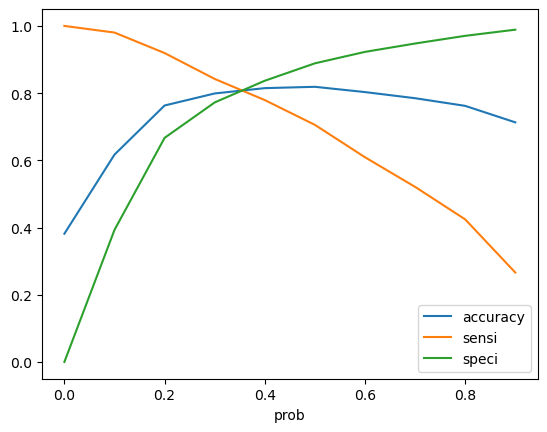

In [334]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, it seems that 0.35 is optimal cutoff point to take

In [337]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.059293          302    1    0    0    0    0    0    0   
1          0        0.022673         6087    1    0    0    0    0    0    0   
2          0        0.241976         1033    1    1    1    0    0    0    0   
3          0        0.153273         7656    1    1    0    0    0    0    0   
4          1        0.752513         3241    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    0    0                1

#### Assigning lead score to the leads based to prediction

In [340]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [342]:
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.059293          302    1    0    0    0    0    0    0   
1          0        0.022673         6087    1    0    0    0    0    0    0   
2          0        0.241976         1033    1    1    1    0    0    0    0   
3          0        0.153273         7656    1    1    0    0    0    0    0   
4          1        0.752513         3241    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0                0           6  
1    0    0    0                0           2  
2    0    0    0                0          24  
3    0    0    0                0          15  
4    1    0    0                1          75

In [344]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8074807480748075

In [346]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3169,  766],
       [ 459, 1969]], dtype=int64)

In [348]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [350]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8109555189456342

In [352]:
# Let us calculate specificity
TN / float(TN+FP)

0.8053367217280814

In [354]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.19466327827191868


In [356]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7199268738574041


In [358]:
# Negative predictive value
print (TN / float(TN+ FN))

0.87348401323043


## Precision and Recall

In [361]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3169,  766],
       [ 459, 1969]], dtype=int64)

#### 
Precision.

TP / TP + FP

In [367]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7199268738574041

##### Recall
TP / TP + FN

In [370]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8109555189456342

#### Using sklearn utilities for the same

In [373]:
from sklearn.metrics import precision_score, recall_score

In [375]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7199268738574041

In [377]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8109555189456342

## We have the following values for train data

Accuracy : 81%

Sensitivity : 81%

Specificity : 80%

Precision: 72%

Recall: 81%

#### Precision Recall Tradeoff

In [396]:
from sklearn.metrics import precision_recall_curve

In [398]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

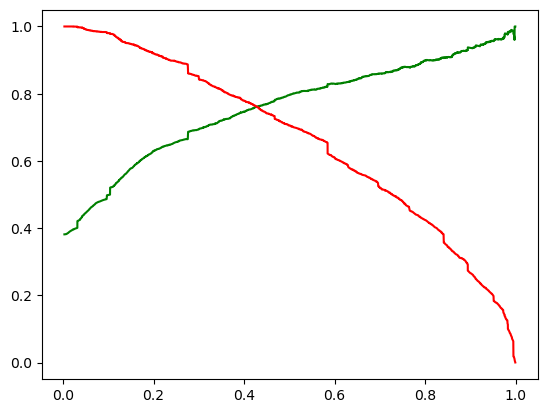

In [400]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### The cut-off point of Precision Recall curve is around 0.45

#### Plotting the ROC curve

In [404]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [406]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

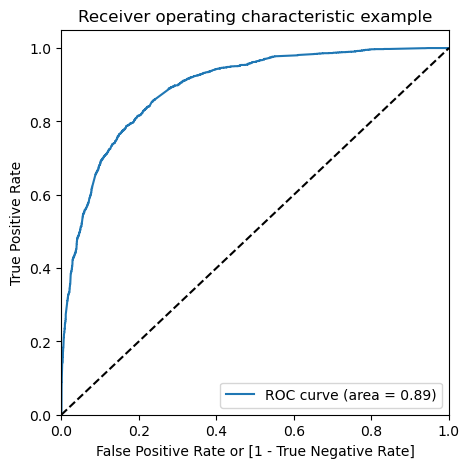

In [408]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### The AUC score of 0.89 indicates a good model fit

#### Model Evaluation using the Precision Recall tradeoff value of 0.45

In [413]:
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.059293          302    1    0    0    0    0    0    0   
1          0        0.022673         6087    1    0    0    0    0    0    0   
2          0        0.241976         1033    1    1    1    0    0    0    0   
3          0        0.153273         7656    1    1    0    0    0    0    0   
4          1        0.752513         3241    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  Lead_Score  final_predicted_2  
0    0    0    0                0           6                  0  
1    0    0    0                0           2                  0  
2    0    0    0                0          24                  0  
3    0    0    0                0          15                  0  
4    1    0    0                1          75                  1

In [415]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
confusion_2

array([[3394,  541],
       [ 628, 1800]], dtype=int64)

In [417]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8162816281628162

In [419]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [421]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7413509060955519

In [423]:
# Let us calculate specificity
TN / float(TN+FP)

0.8625158831003812

In [425]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.1374841168996188


In [427]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7689021785561726


In [429]:
# Negative predictive value
print (TN / float(TN+ FN))

0.843858776727996


In [431]:
# Precision

confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.7689021785561726

In [433]:
# Recall

confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.7413509060955519

#### By using the Precision - Recall trade off curve cut off point, Both Sensitivity & Recall values has decreased. This will not serve our business problem on hand. Hence, we will proceed with initial optimal cut-off value of 0.35 only

### Making predictions on the test set

In [439]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [441]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
6906             0                     1.919395   
1873             0                    -0.546142   
771              0                    -0.797465   
4495             0                    -0.623190   
9061             0                     2.392690   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
6906                                    1                          0   
1873                                    1                          0   
771                                     0                          0   
4495                                    1                          0   
9061                                    1                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
6906                       0                             0   
1873                       0                             0   
771                        0                             0   
4495                       0                             0   
9061                       0                             0   

      Last Activity_Converted to Lead  Last Activity_Olark Chat Conversation  \
6906                                0                                      0   
1873                                0                                      0   
771                                 0                                      0   
4495                                0                                      0   
9061                                0                                      0   

      Last Activity_SMS Sent  Last Activity_Unsubscribed  \
6906                       1                           0   
1873                       1                           0   
771                        0                           0   
4495                       0                           0   
9061                       0                           0   

      Specialization_Other  What is your current occupation_Other  \
6906                     0                                      0   
1873                     1                                      0   
771                      1                                      0   
4495                     0                                      0   
9061                     0                                      1   

      What is your current occupation_Working Professional  
6906                                                  0     
1873                                                  0     
771                                                   0     
4495                                                  0     
9061                                                  0

In [443]:
# Adding Constant to Test model

X_test_sm = sm.add_constant(X_test)

In [445]:
# Making predictions on the test set using final model

y_test_pred = res.predict(X_test_sm)

In [447]:
y_test_pred[:10]

6906    0.900503
1873    0.219998
771     0.122785
4495    0.139472
9061    0.551888
4929    0.521421
2308    0.070545
1034    0.115591
9033    0.117787
7008    0.912599
dtype: float64

In [449]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [451]:
# Let's see the head
y_pred_1.head()

0
6906  0.900503
1873  0.219998
771   0.122785
4495  0.139472
9061  0.551888

In [453]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [455]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [457]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [459]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [461]:
y_pred_final.head()

Converted  Prospect ID         0
0          1         6906  0.900503
1          0         1873  0.219998
2          0          771  0.122785
3          0         4495  0.139472
4          1         9061  0.551888

In [463]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [467]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [469]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         6906          1        0.900503
1         1873          0        0.219998
2          771          0        0.122785
3         4495          0        0.139472
4         9061          1        0.551888

In [471]:
#Assigning 'Lead Score' to dataframe 'y_pred_final':-

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [473]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score
0         6906          1        0.900503          90
1         1873          0        0.219998          22
2          771          0        0.122785          12
3         4495          0        0.139472          14
4         9061          1        0.551888          55

In [475]:
# Using optimal cut-off value of 0.35, updating the dataframe with final prediction values

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [477]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  Lead_Score  final_predicted
0         6906          1        0.900503          90                1
1         1873          0        0.219998          22                0
2          771          0        0.122785          12                0
3         4495          0        0.139472          14                0
4         9061          1        0.551888          55                1

In [479]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8041804180418042

In [481]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1331,  329],
       [ 205,  862]], dtype=int64)

In [483]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [485]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8078725398313027

In [487]:
# Let us calculate specificity
TN / float(TN+FP)

0.8018072289156627

In [489]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.19819277108433736


In [491]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7237615449202351


In [493]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8665364583333334


In [495]:
# Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7237615449202351

In [497]:
# Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8078725398313027

#### 
sensitivity value for test data is 81% while for train data is also 81%.
accuracy value for test data is 80% while for train data is also 81%.
Both of these metrics shows that our model is performing well for test data set also.

## Final Logistic Regression model is 

#### 
-0.2785 - 1.6051xDo Not Email + 1.0675xTotal Time Spent on Website - 0.8760xLead Origin_Landing Page Submission + 2.8909xLead Origin_Lead Add Form + 1.0952xLead Source_Olark Chat + 3.1667xLead Source_Welingak Website - 1.1395xLast Activity_Converted to Lead - 1.2742xLast Activity_Olark Chat Conversation + 1.3083xLast Activity_SMS Sent + 1.3908xLast Activity_Unsubscribed - 0.8366xSpecialization_Other - 1.1914xWhat is your current occupation_Other + 2.3946xWhat is your current occupation_Working Professional 

## Model Evaluation metrics

### Determining feature importance

In [514]:
res.params[1:]

Do Not Email                                           -1.605121
Total Time Spent on Website                             1.067493
Lead Origin_Landing Page Submission                    -0.875964
Lead Origin_Lead Add Form                               2.890941
Lead Source_Olark Chat                                  1.095206
Lead Source_Welingak Website                            3.166721
Last Activity_Converted to Lead                        -1.139515
Last Activity_Olark Chat Conversation                  -1.274171
Last Activity_SMS Sent                                  1.308321
Last Activity_Unsubscribed                              1.390753
Specialization_Other                                   -0.836563
What is your current occupation_Other                  -1.191447
What is your current occupation_Working Professional    2.394608
dtype: float64

In [518]:
top_feature = res.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature.sort_values(ascending = False)

Lead Source_Welingak Website                            100.000000
Lead Origin_Lead Add Form                                91.291311
What is your current occupation_Working Professional     75.617920
Last Activity_Unsubscribed                               43.917779
Last Activity_SMS Sent                                   41.314677
Lead Source_Olark Chat                                   34.584874
Total Time Spent on Website                              33.709718
Specialization_Other                                    -26.417332
Lead Origin_Landing Page Submission                     -27.661534
Last Activity_Converted to Lead                         -35.984065
What is your current occupation_Other                   -37.624009
Last Activity_Olark Chat Conversation                   -40.236284
Do Not Email                                            -50.687170
dtype: float64